#Importing Lib

In [19]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np

#Importing DataSet

In [20]:
dataset = pd.read_csv("/content/Salary_Data.csv")
dataset.info()
X = dataset.YearsExperience.values
y = dataset.Salary.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#Appending ones for matrix

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X.shape

# Reshape X to have 2 dimensions before appending.
X = X.reshape(-1, 1)
X = np.append(np.ones((30,1)),X,axis=1)
def normal_equation(X,y):
    return np.linalg.inv(X.T@X)@X.T@y
theta = normal_equation(X,y)
theta

array([25792.20019867,  9449.96232146])

In [25]:
def predict(X, theta):
    # Reshape X to have 2 dimensions before appending.
    X = X.reshape(-1, 1)
    X = np.append(np.ones((X.shape[0],1)), X,axis=1)
    return (X @ theta).reshape(10,)
y_pred = predict(X_test,theta)

#Measuring accuracy

In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred) * 100)


97.68525143048815


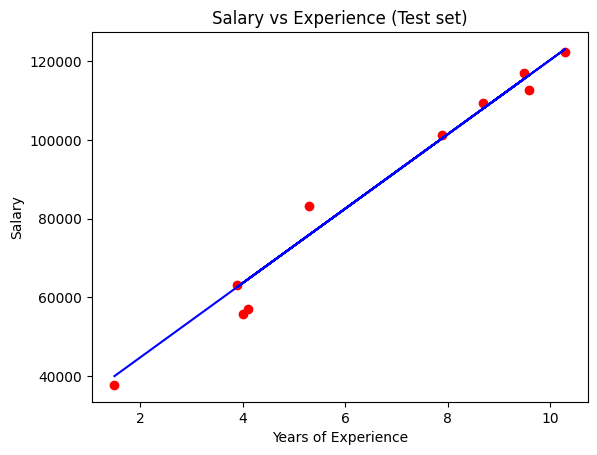

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test,y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
